# PaySim 거래 데이터 기반 Liquidity & User Behavior 종합 분석 보고서

## Executive Summary
본 보고서는 PaySim 모바일 결제 플랫폼의 거래 데이터를 활용하여, **사기 탐지를 넘어선 전반적인 거래 생태계 이해**를 목표로 함.

기존 AARRR 리스크 분석이 "사기 계정의 이상 패턴"에 집중했다면, 본 분석은 다음과 같은 질문에 답함:

- **돈이 어떻게 움직이는가?** → Liquidity Flow Analysis
- **왜 그렇게 움직이는가?** → Transaction Network & Pathway Analysis  
- **누가 그렇게 움직이는가?** → User Segmentation & Profiling Analysis
- **시간이 지나면 어떻게 변하는가?** → Temporal Pattern & Lifecycle Analysis

---

## 분석 목적 (Objective)

### 핵심 목표
1. **거래 흐름의 구조적 이해**: 자금이 어디서 발생하고 어디로 흘러가는지 파악
2. **유저 행동 패턴 발견**: 정상 유저의 다양한 거래 패턴과 라이프사이클 이해
3. **플랫폼 건강성 지표 도출**: 유동성, 네트워크 활성도, 유저 참여도 측정
4. **데이터 기반 인사이트**: 비즈니스 전략 수립을 위한 실행 가능한 인사이트 제공

### 기대 효과
- **Product**: 유저 경험 개선을 위한 기능 우선순위 설정
- **Marketing**: 세그먼트별 맞춤 전략 수립
- **Risk**: 정상 범위 정의를 통한 효과적인 이상 탐지
- **Operations**: 자원 배분 최적화 (고가치 유저 집중 관리)

---

## 데이터셋 개요 (Dataset Overview)

### PaySim 데이터셋
- **출처**: Mobile Money Transaction Simulator
- **규모**: 114,957건의 거래 데이터
- **기간**: step 0부터 최대값까지 (시계열 데이터)

### 주요 변수 (Key Variables)

| 변수명 | 설명 | 활용 목적 |
|--------|------|-----------|
| `step` | 거래 발생 시점 (시간 단위) | 시계열 분석, 라이프사이클 추적 |
| `type` | 거래 유형 (PAYMENT, TRANSFER, CASH_OUT, DEBIT, CASH_IN) | 행동 패턴 분류 |
| `amount` | 거래 금액 | 유동성 규모, 세그멘테이션 |
| `nameOrig` | 송금자 ID | 네트워크 분석 (출발 노드) |
| `nameDest` | 수취자 ID | 네트워크 분석 (도착 노드) |
| `oldbalanceOrg` / `newbalanceOrig` | 송금자 잔액 변화 | 유동성 동학, 잔액 관리 패턴 |
| `oldbalanceDest` / `newbalanceDest` | 수취자 잔액 변화 | 자금 축적 패턴 |
| `signup_step` | 계정 가입 시점 | 신규/기존 유저 구분, 코호트 분석 |
| `isActivation` | 계정 활성화 여부 (0/1) | 유저 상태 분류 |
| `isReferral` | 추천 가입 여부 (0/1) | 획득 채널 분석 |
| `isFraud` | 사기 여부 (0/1) | 정상 데이터 필터링 (본 분석에서는 참고용) |

---

## 분석 프레임워크 (Analysis Framework)

본 분석은 **3단계 인과 흐름 구조**로 설계됨.:

각 단계는 이전 단계의 발견을 기반으로 **더 깊은 질문**을 던지며, 최종적으로 **유저 행동의 본질**을 이해하는 것이 목표임.

---

## 핵심 가설 (Key Hypotheses)

### H1: Liquidity (자금 흐름)
**가설**: "소수의 계정이 대부분의 자금 흐름을 독점할 것" (파레토 법칙)
- **검증 방법**: 상위 N% 계정의 거래액 집중도 측정

### H2: Network (네트워크)
**가설**: "대부분의 유저는 소규모 거래 네트워크(1~3명)를 형성하며, 일부 허브 계정(Merchant)이 네트워크를 연결할 것"
- **검증 방법**: Degree centrality, 연결 계정 수 분포 분석

### H3: User Segmentation (유저 세그먼트)
**가설**: "유저는 역할(송금자/수취자), 거래 빈도, 금액 규모에 따라 명확한 군집을 형성할 것"
- **검증 방법**: 행동 변수 기반 클러스터링, 프로파일 비교

### H4: Lifecycle (라이프사이클)
**가설**: "신규 유저는 특정 거래 패턴(예: CASH_IN으로 시작)을 보이며, 시간이 지나면서 행동이 다변화될 것"
- **검증 방법**: signup_step 기준 코호트 분석, 거래 타입 전환 추적

---

## 분석 전제 및 제약사항 (Assumptions & Limitations)

### 전제사항
1. **정상 거래 중심 분석**: isFraud=0인 거래를 주요 분석 대상으로 하되, 필요시 사기 데이터와 비교
2. **익명화된 ID**: nameOrig, nameDest는 익명 ID로, 실제 신원 정보 없음
3. **시뮬레이션 데이터**: PaySim은 실제 데이터 기반 시뮬레이션이므로, 실제 플랫폼과 차이 존재 가능

### 제약사항
- **시간 단위 불명확**: step의 실제 시간 단위(시간/일) 불명
- **거래 타입 제한**: 5가지 타입만 존재, 실제는 더 다양할 수 있음
- **정적 스냅샷**: 특정 기간의 데이터만 포함, 장기 추세는 제한적

---

## 분석에 필요한 핵심 개념 (Technical Background)

### 1. Liquidity (유동성)
**정의**: 금융 시스템 내에서 자금이 얼마나 원활하게 흐르는지를 나타내는 지표

**핵심 개념**:
- **Source (출처)**: 자금이 발생하는 지점 (송금자, CASH_IN 계정)
- **Sink (흡수처)**: 자금이 도착하는 지점 (수취자, Merchant)
- **Flow (흐름)**: 자금의 이동 경로 및 속도
- **Concentration (집중도)**: 특정 계정에 자금이 얼마나 집중되어 있는가

**측정 지표**:
- 거래 금액 분포 (평균, 중앙값, 사분위수)
- 파레토 분석 (상위 X%가 차지하는 비중)
- 잔액 변동성 (Balance Dynamics)

---

### 2. Network Analysis (네트워크 분석)
**정의**: 유저 간 거래를 그래프 구조로 표현하고 연결 패턴을 분석

**핵심 개념**:
- **Node (노드)**: 각 유저 계정 (nameOrig, nameDest)
- **Edge (엣지)**: 거래 관계 (A → B 송금)
- **Degree (연결 차수)**:
  - In-degree: 받는 거래 수
  - Out-degree: 보내는 거래 수
- **Centrality (중심성)**: 네트워크에서 얼마나 중요한 위치인가

**활용 사례**:
- 허브 계정 식별 (Merchant, 중개자)
- 거래 체인 추적 (Multi-hop)
- 커뮤니티 탐지 (유저 군집)

---

### 3. User Segmentation (유저 세그멘테이션)
**정의**: 유저를 행동 패턴에 따라 의미 있는 그룹으로 분류

**세그멘테이션 기준**:
1. **역할 기반**: Sender vs Receiver vs Bidirectional
2. **거래 패턴 기반**: 
   - High Volume Low Amount (소액 다빈도)
   - Low Volume High Amount (고액 저빈도)
3. **라이프사이클 기반**: 신규 vs 활성 vs 휴면

**분석 목적**:
- 타겟 마케팅
- 맞춤형 서비스 제공
- 리스크 레벨 차등 적용

---

### 4. Transaction Pathway (거래 경로)
**정의**: 유저가 어떤 순서로 거래 행동을 하는지 추적

**분석 방법**:
- **Sequential Pattern Mining**: CASH_IN → TRANSFER → CASH_OUT 같은 시퀀스 발견
- **Funnel Analysis**: 각 단계별 전환율 측정
- **Path Clustering**: 유사한 경로를 묶어 대표 패턴 도출

**비즈니스 활용**:
- UX 개선 (주요 경로 최적화)
- 이탈 지점 파악
- 크로스셀 기회 발견

---

### 5. 파레토 법칙 (80/20 Rule)
**정의**: 전체 결과의 80%는 전체 원인의 20%에서 발생한다는 경험 법칙

**금융 데이터 적용**:
- 상위 20% 유저가 전체 거래액의 80% 차지
- 소수의 고액 거래자 vs 다수의 소액 거래자

**분석 의의**:
- 자원 집중 포인트 식별
- VIP 고객 정의
- 롱테일 전략 수립

---

In [2]:
# ============================================================
# 환경 설정 및 패키지 로드
# ============================================================

# 필수 패키지 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import pymysql
import warnings
warnings.filterwarnings('ignore')

# 시각화 기본 설정
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
sns.set_palette("husl")

# MySQL 접속 정보
user = 'root'
password = '0818'
host = 'localhost'
port = 3306
db = 'finsight'

# DB 연결 엔진 생성
try:
    engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{db}')
    print("MySQL database connection successful")
    
    # 연결 테스트
    test_query = "SELECT COUNT(*) as total_records FROM paysim;"
    test_result = pd.read_sql_query(test_query, engine)
    print(f"Total transactions: {test_result['total_records'][0]:,}")
    
except Exception as e:
    print(f"Database connection error: {e}")
    print("Please check connection info and MySQL server status")

print("\n" + "="*60)
print("Analysis environment setup complete")
print("="*60)

MySQL database connection successful
Total transactions: 26,054

Analysis environment setup complete


# PART 1: Liquidity Flow Analysis (자금 흐름 분석)

## 분석 목표
"이 플랫폼에서 돈이 어떻게 움직이는가?"

본 파트에서는 PaySim 플랫폼의 **전체적인 자금 흐름 구조**를 파악함.
- 어떤 거래 유형이 dominant한가?
- 자금이 특정 계정에 집중되는가?
- 유저들은 어떤 역할(송금자/수취자)을 하는가?

이를 통해 플랫폼의 **유동성 건강성**을 진단하고, 다음 단계 분석의 기준선을 설정함.

---

## 1.1 거래 생태계 전체 현황

### 분석 질문
- 5가지 거래 유형(PAYMENT, TRANSFER, CASH_OUT, DEBIT, CASH_IN) 중 어떤 것이 가장 많이 사용되는가?
- 거래 **건수**가 많은 타입과 거래 **금액**이 큰 타입이 같은가, 다른가?
- 평균 거래 금액은 거래 유형마다 어떻게 다른가?

### 예상 가설
"CASH_OUT과 TRANSFER가 거래의 대부분을 차지할 것이며, 거래 건수와 금액 비중에서 차이가 나타날 것"

---

Transaction Ecosystem Overview
transaction_type  transaction_count  count_percentage  total_amount  amount_percentage  avg_amount  min_amount  max_amount
        CASH_OUT               9156             35.14  1.607507e+09              35.37   175568.65        6.57 10000000.00
         PAYMENT               8793             33.75  1.161530e+08               2.56    13209.72        2.17   151482.05
         CASH_IN               5783             22.20  9.689799e+08              21.32   167556.61        1.26   817309.17
        TRANSFER               2159              8.29  1.850341e+09              40.72   857036.26     1439.44 17271014.73
           DEBIT                163              0.63  1.257383e+06               0.03     7714.00        9.92   202290.92




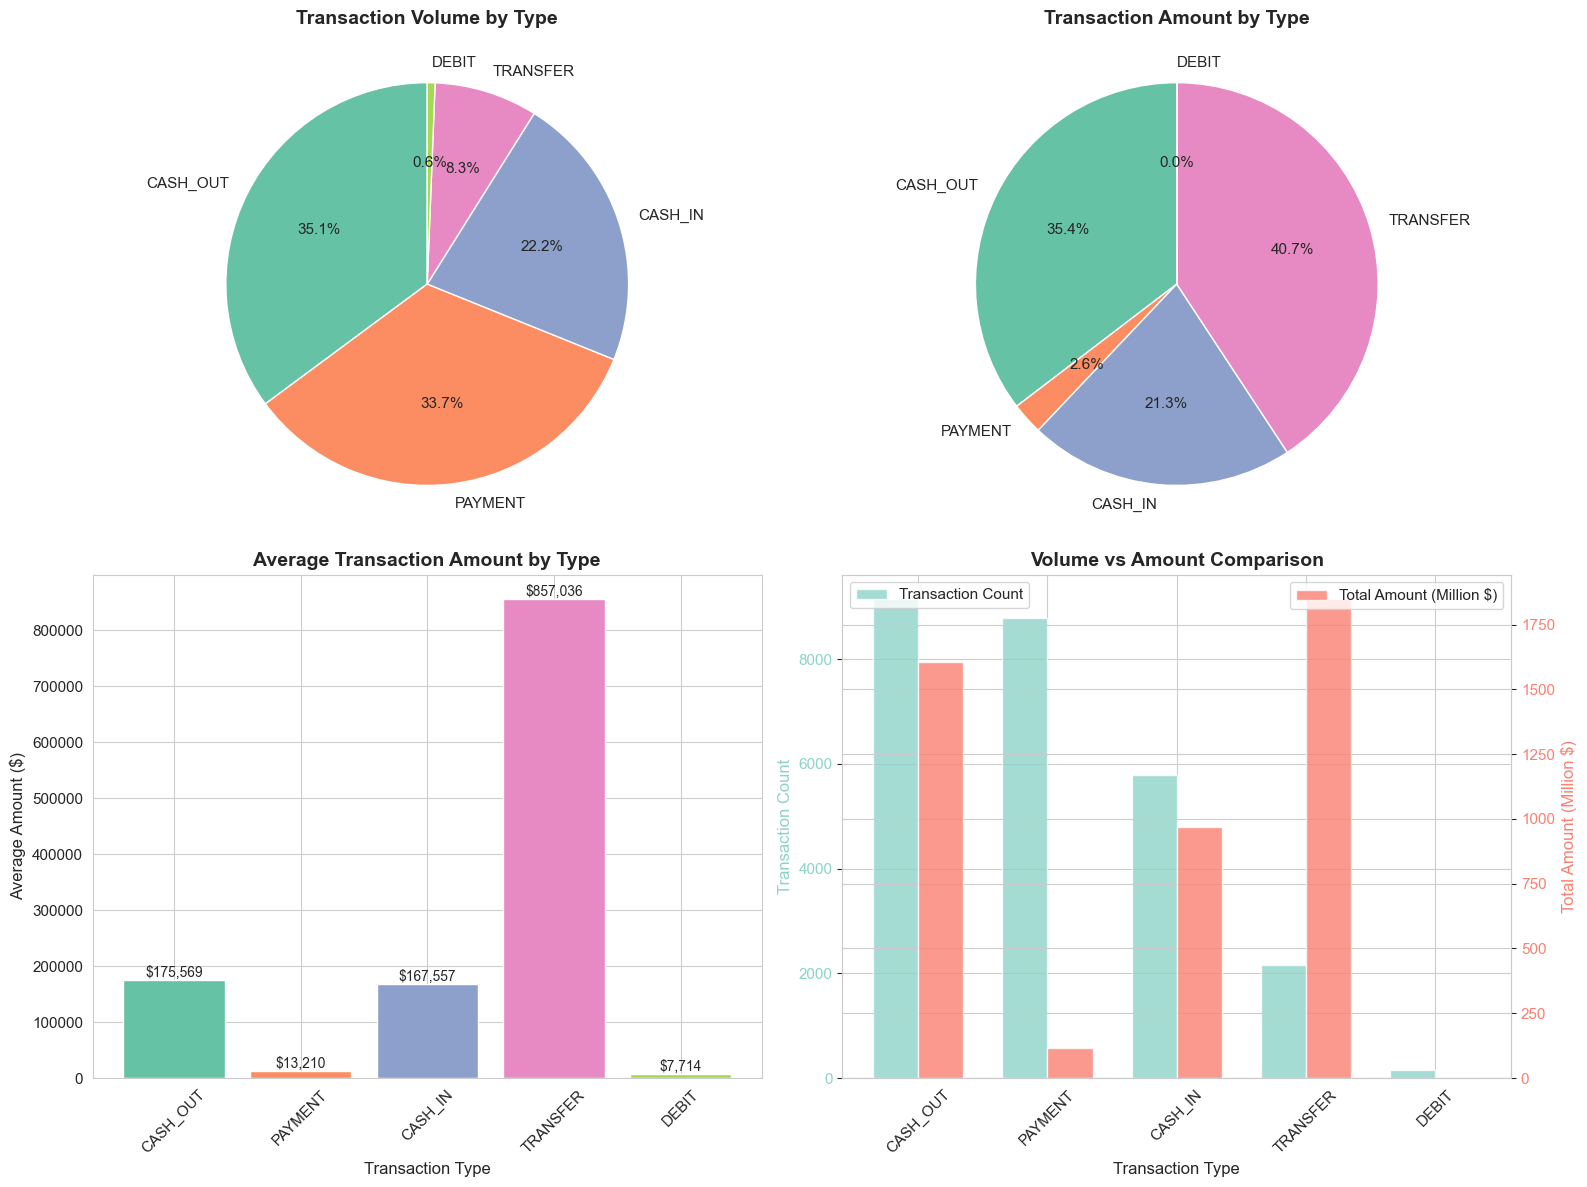

In [3]:
# ============================================================
# PART 1.1: 거래 생태계 전체 현황
# ============================================================

# 거래 유형별 거래량, 거래금액 분포
ecosystem_query = """
SELECT 
    type AS transaction_type,
    COUNT(*) AS transaction_count,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM paysim), 2) AS count_percentage,
    ROUND(SUM(amount), 2) AS total_amount,
    ROUND(SUM(amount) * 100.0 / (SELECT SUM(amount) FROM paysim), 2) AS amount_percentage,
    ROUND(AVG(amount), 2) AS avg_amount,
    ROUND(MIN(amount), 2) AS min_amount,
    ROUND(MAX(amount), 2) AS max_amount
FROM paysim
GROUP BY type
ORDER BY transaction_count DESC;
"""

try:
    ecosystem_result = pd.read_sql_query(ecosystem_query, engine)
    print("=" * 80)
    print("Transaction Ecosystem Overview")
    print("=" * 80)
    print(ecosystem_result.to_string(index=False))
    print("\n")
    
    # 시각화
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. 거래 건수 비율
    ax1 = axes[0, 0]
    colors = sns.color_palette("Set2", len(ecosystem_result))
    ax1.pie(ecosystem_result['transaction_count'], 
            labels=ecosystem_result['transaction_type'],
            autopct='%1.1f%%',
            colors=colors,
            startangle=90)
    ax1.set_title('Transaction Volume by Type', fontsize=14, fontweight='bold')
    
    # 2. 거래 금액 비율
    ax2 = axes[0, 1]
    ax2.pie(ecosystem_result['total_amount'], 
            labels=ecosystem_result['transaction_type'],
            autopct='%1.1f%%',
            colors=colors,
            startangle=90)
    ax2.set_title('Transaction Amount by Type', fontsize=14, fontweight='bold')
    
    # 3. 평균 거래 금액 비교
    ax3 = axes[1, 0]
    bars = ax3.bar(ecosystem_result['transaction_type'], 
                    ecosystem_result['avg_amount'],
                    color=colors)
    ax3.set_title('Average Transaction Amount by Type', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Transaction Type', fontsize=12)
    ax3.set_ylabel('Average Amount ($)', fontsize=12)
    ax3.tick_params(axis='x', rotation=45)
    
    # 값 표시
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}',
                ha='center', va='bottom', fontsize=10)
    
    # 4. 거래 건수 vs 총 금액 비교
    ax4 = axes[1, 1]
    x = np.arange(len(ecosystem_result))
    width = 0.35
    
    ax4_twin = ax4.twinx()
    
    bars1 = ax4.bar(x - width/2, ecosystem_result['transaction_count'], 
                    width, label='Transaction Count', color='#8dd3c7', alpha=0.8)
    bars2 = ax4_twin.bar(x + width/2, ecosystem_result['total_amount']/1e6, 
                         width, label='Total Amount (Million $)', color='#fb8072', alpha=0.8)
    
    ax4.set_xlabel('Transaction Type', fontsize=12)
    ax4.set_ylabel('Transaction Count', fontsize=12, color='#8dd3c7')
    ax4_twin.set_ylabel('Total Amount (Million $)', fontsize=12, color='#fb8072')
    ax4.set_title('Volume vs Amount Comparison', fontsize=14, fontweight='bold')
    ax4.set_xticks(x)
    ax4.set_xticklabels(ecosystem_result['transaction_type'], rotation=45)
    ax4.tick_params(axis='y', labelcolor='#8dd3c7')
    ax4_twin.tick_params(axis='y', labelcolor='#fb8072')
    
    ax4.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Query execution error: {e}")

## 1.1 분석 결과: 거래 생태계의 구조적 특징

### 핵심 발견 (Key Findings)

**1. 거래 건수 vs 거래 금액의 극명한 불일치**
- **PAYMENT**: 거래 건수 33.7% (2위) ↔ 거래 금액 2.6% (최하위)
  - 소액 결제가 대부분 (평균 $13,210)
  - 일상적인 상점 결제, 청구서 납부 등으로 추정됨
  
- **TRANSFER**: 거래 건수 8.3% (4위) ↔ 거래 금액 40.7% (1위)
  - 고액 송금 중심 (평균 $857,036)
  - 건수는 적지만 플랫폼 유동성의 핵심 동력

**2. CASH_OUT의 지배적 지위**
- 거래 건수 35.1% (1위), 거래 금액 35.4% (2위)
- 유저들이 플랫폼에서 **현금을 빼내는 행위**가 가장 활발함
- 평균 거래액 $175,569로 중간 규모

**3. CASH_IN의 균형적 역할**
- 거래 건수 22.2%, 거래 금액 21.3%
- 건수와 금액이 비슷한 비율 → 안정적인 자금 유입 구조
- 평균 거래액 $167,557

**4. DEBIT의 미미한 영향**
- 거래 건수 0.63%, 거래 금액 0.03%
- 플랫폼에서 거의 사용되지 않는 거래 유형

---

### 인사이트 도출 (Insights)

**플랫폼의 자금 흐름 패턴**:

이는 유저들이:
1. 플랫폼에 자금을 입금하고 (CASH_IN)
2. 타인에게 송금한 뒤 (TRANSFER)
3. 즉시 현금화함 (CASH_OUT)

즉, **PaySim은 저장 수단이 아닌 이동 수단**으로 활용되고 있음을 시사함.

---

### 다음 단계 질문 (Next Questions)

이 발견은 새로운 질문을 제기함:
1. **"TRANSFER의 고액 거래는 누가 하는가?"** → 소수의 고액 유저가 존재하는가?
2. **"자금이 특정 계정에 집중되는가?"** → 파레토 법칙이 성립하는가?
3. **"송금 전용 vs 수취 전용 계정이 있는가?"** → 유저 역할 분류 필요

이를 확인하기 위해 **1.2 자금 집중도 & 유저 역할 분류 분석**으로 진행함.

---

## 1.2 자금 집중도 & 잔액 동학 분석

### 분석 질문
1. **파레토 법칙이 성립하는가?** 소수의 고액 거래가 전체 금액을 지배하는가?
2. **유저들은 플랫폼을 어떻게 사용하는가?** 저장소 vs 이동 통로
3. **거래 타입별로 잔액 관리 패턴이 다른가?** 완전 청산 vs 부분 인출 vs 잔액 증가

### 가설
"소수의 고액 거래가 전체 금액의 대부분을 차지하며(파레토 법칙), TRANSFER와 CASH_OUT은 거래 후 잔액을 완전히 비우는 패턴을 보일 것"

---

Transaction Amount Distribution
         amount_segment  tx_count  tx_percentage  total_amount  amount_percentage  avg_amount
       1. Micro (<$10K)      5244          20.13  2.471283e+07               0.54     4712.59
  2. Small ($10K-$100K)      9212          35.36  3.707401e+08               8.16    40245.34
3. Medium ($100K-$500K)     10232          39.27  2.354534e+09              51.81   230114.78
   4. Large ($500K-$1M)       861           3.30  5.672751e+08              12.48   658856.08
         5. Mega (>$1M)       505           1.94  1.226976e+09              27.00  2429654.76


Balance Management Style by Transaction Type
    type  total_tx  complete_withdrawal_rate  balance_increase_rate  partial_withdrawal_rate
CASH_OUT      9156                     43.36                    0.0                    10.56
 PAYMENT      8793                     15.19                    0.0                    48.73
 CASH_IN      5783                      0.00                  100.0           

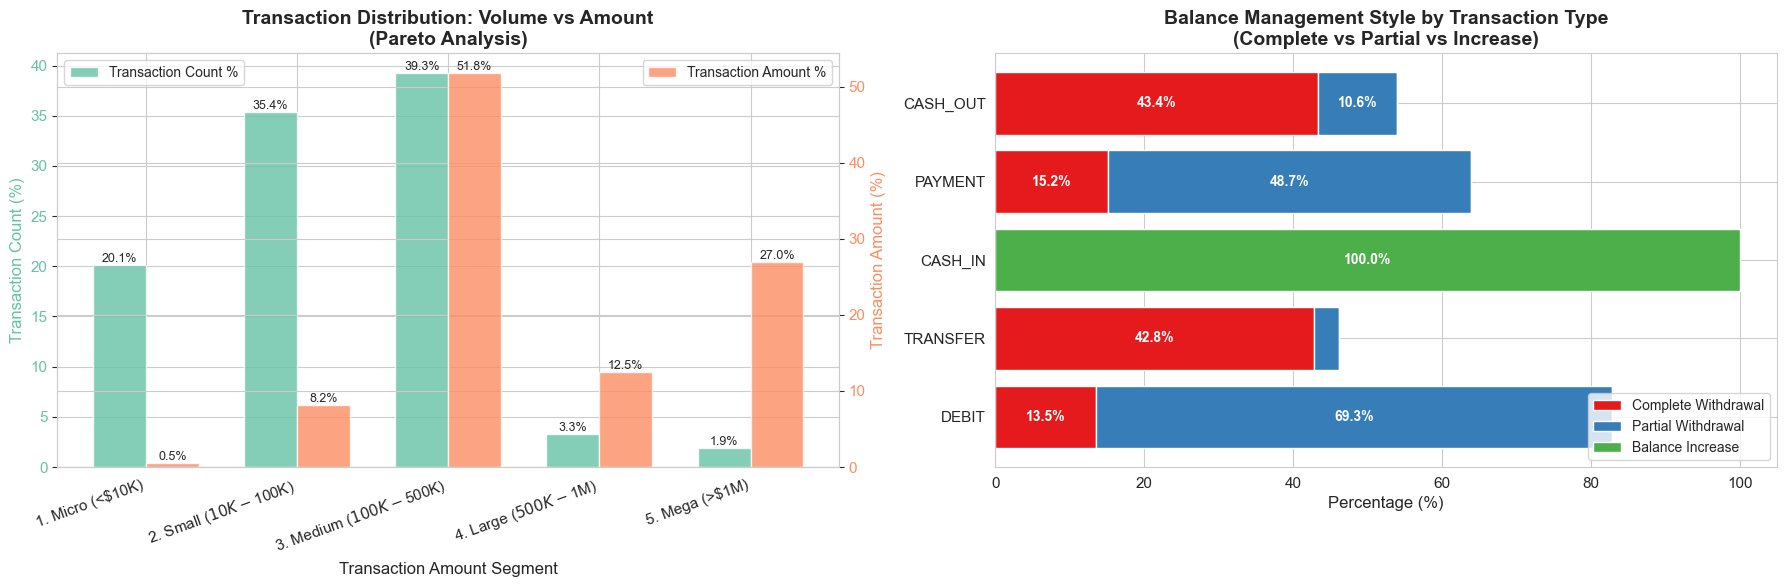

In [9]:
# ============================================================
# PART 1.2: 자금 집중도 & 잔액 동학 분석
# ============================================================

# 1.2.1 거래 금액 분포 - 소액 vs 고액 유저
amount_distribution_query = """
SELECT 
    CASE 
        WHEN amount < 10000 THEN '1. Micro (<$10K)'
        WHEN amount < 100000 THEN '2. Small ($10K-$100K)'
        WHEN amount < 500000 THEN '3. Medium ($100K-$500K)'
        WHEN amount < 1000000 THEN '4. Large ($500K-$1M)'
        ELSE '5. Mega (>$1M)'
    END AS amount_segment,
    COUNT(*) as tx_count,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM paysim), 2) as tx_percentage,
    ROUND(SUM(amount), 2) as total_amount,
    ROUND(SUM(amount) * 100.0 / (SELECT SUM(amount) FROM paysim), 2) as amount_percentage,
    ROUND(AVG(amount), 2) as avg_amount
FROM paysim
GROUP BY amount_segment
ORDER BY amount_segment;
"""

# 1.2.2 거래 타입별 잔액 관리 스타일
balance_style_by_type_query = """
SELECT 
    type,
    COUNT(*) as total_tx,
    ROUND(SUM(CASE WHEN newbalanceOrig = 0 AND oldbalanceOrg > 0 THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) as complete_withdrawal_rate,
    ROUND(SUM(CASE WHEN newbalanceOrig > oldbalanceOrg THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) as balance_increase_rate,
    ROUND(SUM(CASE WHEN newbalanceOrig < oldbalanceOrg AND newbalanceOrig > 0 THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) as partial_withdrawal_rate
FROM paysim
GROUP BY type
ORDER BY total_tx DESC;
"""

# 1.2.3 잔액 변화 패턴 분석
balance_pattern_query = """
SELECT 
    CASE 
        WHEN newbalanceOrig = 0 AND oldbalanceOrg > 0 THEN 'Complete Withdrawal'
        WHEN newbalanceOrig > oldbalanceOrg THEN 'Balance Increase'
        WHEN newbalanceOrig < oldbalanceOrg AND newbalanceOrig > 0 THEN 'Partial Withdrawal'
        ELSE 'No Change or Zero Start'
    END AS balance_pattern,
    COUNT(*) as tx_count,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM paysim), 2) as percentage,
    ROUND(AVG(amount), 2) as avg_amount
FROM paysim
GROUP BY balance_pattern
ORDER BY tx_count DESC;
"""

# 1.2.4 거래 빈도 분석
transaction_frequency_query = """
WITH user_tx_count AS (
    SELECT 
        nameOrig as user_id,
        COUNT(*) as tx_count,
        SUM(amount) as total_amount
    FROM paysim
    GROUP BY nameOrig
)
SELECT 
    CASE 
        WHEN tx_count = 1 THEN '1. One-time User'
        WHEN tx_count <= 3 THEN '2. Low Frequency (2-3 tx)'
        WHEN tx_count <= 10 THEN '3. Medium Frequency (4-10 tx)'
        ELSE '4. High Frequency (>10 tx)'
    END AS frequency_segment,
    COUNT(*) as user_count,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(DISTINCT nameOrig) FROM paysim), 2) as user_percentage
FROM user_tx_count
GROUP BY frequency_segment
ORDER BY frequency_segment;
"""

try:
    # 데이터 조회
    amount_dist = pd.read_sql_query(amount_distribution_query, engine)
    balance_style = pd.read_sql_query(balance_style_by_type_query, engine)
    balance_pattern = pd.read_sql_query(balance_pattern_query, engine)
    tx_frequency = pd.read_sql_query(transaction_frequency_query, engine)
    
    # 결과 출력
    print("=" * 80)
    print("Transaction Amount Distribution")
    print("=" * 80)
    print(amount_dist.to_string(index=False))
    print("\n")
    
    print("=" * 80)
    print("Balance Management Style by Transaction Type")
    print("=" * 80)
    print(balance_style.to_string(index=False))
    print("\n")
    
    print("=" * 80)
    print("Balance Change Patterns")
    print("=" * 80)
    print(balance_pattern.to_string(index=False))
    print("\n")
    
    print("=" * 80)
    print("Transaction Frequency Analysis")
    print("=" * 80)
    print(tx_frequency.to_string(index=False))
    print("\n")
    
    # 시각화 - 핵심 2개만
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # 1. 거래 금액 분포 (건수 vs 금액) - 파레토 법칙 확인
    ax1 = axes[0]
    x = np.arange(len(amount_dist))
    width = 0.35
    
    ax1_twin = ax1.twinx()
    
    bars1 = ax1.bar(x - width/2, amount_dist['tx_percentage'], 
                    width, label='Transaction Count %', color='#66c2a5', alpha=0.8)
    bars2 = ax1_twin.bar(x + width/2, amount_dist['amount_percentage'], 
                         width, label='Transaction Amount %', color='#fc8d62', alpha=0.8)
    
    ax1.set_xlabel('Transaction Amount Segment', fontsize=12)
    ax1.set_ylabel('Transaction Count (%)', fontsize=12, color='#66c2a5')
    ax1_twin.set_ylabel('Transaction Amount (%)', fontsize=12, color='#fc8d62')
    ax1.set_title('Transaction Distribution: Volume vs Amount\n(Pareto Analysis)', 
                  fontsize=14, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(amount_dist['amount_segment'], rotation=20, ha='right')
    ax1.tick_params(axis='y', labelcolor='#66c2a5')
    ax1_twin.tick_params(axis='y', labelcolor='#fc8d62')
    
    # 값 표시
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=9)
    
    for bar in bars2:
        height = bar.get_height()
        ax1_twin.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=9)
    
    ax1.legend(loc='upper left', fontsize=10)
    ax1_twin.legend(loc='upper right', fontsize=10)
    
    # 2. 타입별 잔액 관리 스타일 (Stacked)
    ax2 = axes[1]
    
    categories = balance_style['type']
    complete = balance_style['complete_withdrawal_rate']
    partial = balance_style['partial_withdrawal_rate']
    increase = balance_style['balance_increase_rate']
    
    ax2.barh(categories, complete, label='Complete Withdrawal', color='#e41a1c')
    ax2.barh(categories, partial, left=complete, label='Partial Withdrawal', color='#377eb8')
    ax2.barh(categories, increase, left=complete+partial, label='Balance Increase', color='#4daf4a')
    
    ax2.set_xlabel('Percentage (%)', fontsize=12)
    ax2.set_title('Balance Management Style by Transaction Type\n(Complete vs Partial vs Increase)', 
                  fontsize=14, fontweight='bold')
    ax2.legend(loc='lower right', fontsize=10)
    ax2.invert_yaxis()
    
    # 각 바에 주요 값 표시
    for i, (cat, comp, part, inc) in enumerate(zip(categories, complete, partial, increase)):
        if comp > 5:
            ax2.text(comp/2, i, f'{comp:.1f}%', 
                    ha='center', va='center', fontsize=10, fontweight='bold', color='white')
        if part > 5:
            ax2.text(comp + part/2, i, f'{part:.1f}%', 
                    ha='center', va='center', fontsize=10, fontweight='bold', color='white')
        if inc > 5:
            ax2.text(comp + part + inc/2, i, f'{inc:.1f}%', 
                    ha='center', va='center', fontsize=10, fontweight='bold', color='white')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Query execution error: {e}")

## 1.2 분석 결과: 극단적 파레토와 "일회용" 플랫폼

### 핵심 발견 (Key Findings)

**1. 극단적 파레토 법칙 (Extreme Pareto Pattern)**

**거래 건수 vs 거래 금액의 불일치**:
- **중간 금액대($100K-$500K)**: 거래 건수 39.3%, 금액 51.8% → 플랫폼의 주류
- **초고액(>$1M)**: 거래 건수 **1.9%**지만 금액 **27.0%** → 극소수가 금액 지배
- **소액(<$10K)**: 거래 건수 20.1%지만 금액 0.5% → 건수는 많지만 영향 미미

**인사이트**:

---

**2. 완전 청산 문화 (Complete Withdrawal Culture)**

**거래 타입별 잔액 관리 패턴**:

| 거래 타입 | 완전 인출 | 부분 인출 | 잔액 증가 | 해석 |
|-----------|-----------|-----------|-----------|------|
| **TRANSFER** | 42.8% | 3.5% | 0% | 송금 후 대부분 계좌 비움 |
| **CASH_OUT** | 43.4% | 10.6% | 0% | 현금 인출 = 계좌 청산 |
| **PAYMENT** | 15.2% | 48.7% | 0% | 결제 후에도 잔액 유지 |
| **CASH_IN** | 0% | 0% | 100% | 입금이므로 당연히 증가 |
| **DEBIT** | 13.5% | 69.3% | 0% | 소액 차감 중심 |

**핵심 인사이트**:

**전체 잔액 변화 패턴**:
- **Complete Withdrawal (잔액 0)**: 24.0%
- **No Change or Zero Start**: 32.9%
- **Partial Withdrawal**: 20.9%
- **Balance Increase**: 22.2%

→ 약 57%의 거래가 잔액 감소 또는 0으로 끝남

---

**3. 100% 일회성 유저 (Zero Retention)**

- **One-time User**: 100% (26,054명 전원)
- **반복 거래자**: 0명

---

### PART 1 종합 결론

**플랫폼의 본질: "고액 거래 중심의 일회성 자금 통로"**

| 측면 | 발견 | 의미 |
|------|------|------|
| **자금 집중** | 상위 5% 거래가 금액의 40% | 고액 거래자가 수익의 핵심 |
| **거래 구조** | 중간 금액대(39% 건수, 52% 금액) | 가장 안정적인 수익원 |
| **잔액 관리** | 43% 완전 청산 (TRANSFER/CASH_OUT) | 저장소 아닌 통로 |
| **유저 충성도** | 반복 사용자 0%, 일회성 100% | Retention 전무 |

**전형적인 유저 여정**:

# PART 2: Transaction Network Analysis (거래 네트워크 분석)

## 분석 목표
"거래가 어떻게 연결되고, 어떤 경로로 흐르는가?"

PART 1에서 자금의 흐름과 관리 패턴을 확인했음. 이제 **유저 간 연결 구조**를 파악함:
- 유저들은 몇 명과 거래하는가?
- 허브 역할을 하는 계정이 있는가?
- 거래는 어떤 순서로 일어나는가?

---

## 2.1 거래 연결 구조 & 경로 패턴

### 분석 질문
1. **유저들은 몇 명과 거래하는가?** 1:1 vs 1:多 패턴
2. **허브 계정이 존재하는가?** 많은 사람과 거래하는 중심 계정
3. **거래 타입은 어떤 순서로 발생하는가?** CASH_IN → TRANSFER → CASH_OUT?

### 가설
"대부분의 유저는 1~3명과만 거래하며(P2P), 소수의 허브 계정(Merchant)이 다수와 연결될 것. 거래는 CASH_IN → TRANSFER/PAYMENT → CASH_OUT 순서를 따를 것"

---

User Connectivity Distribution
 connectivity_segment     role  user_count  avg_connections  avg_tx_per_user
 1. One Partner (1:1) Receiver       25035             1.00             1.00
2. Few Partners (2-3) Receiver         502             2.03             2.03
 1. One Partner (1:1)   Sender       26054             1.00             1.00


Top Hub Accounts (Most Connected)
 account_id unique_connections total_tx  total_amount     hub_type
C1040847151                  3        3   16422570.90 Receiver Hub
C1201831265                  3        3     681834.78 Receiver Hub
C1328066869                  3        3     246295.55 Receiver Hub
C1337111208                  3        3     393789.73 Receiver Hub
C1554565380                  3        3    2149383.16 Receiver Hub
C1657041838                  3        3     562965.98 Receiver Hub
 C428796726                  3        3     274046.77 Receiver Hub
  C45445256                  3        3     686987.08 Receiver Hub
 C456278962           

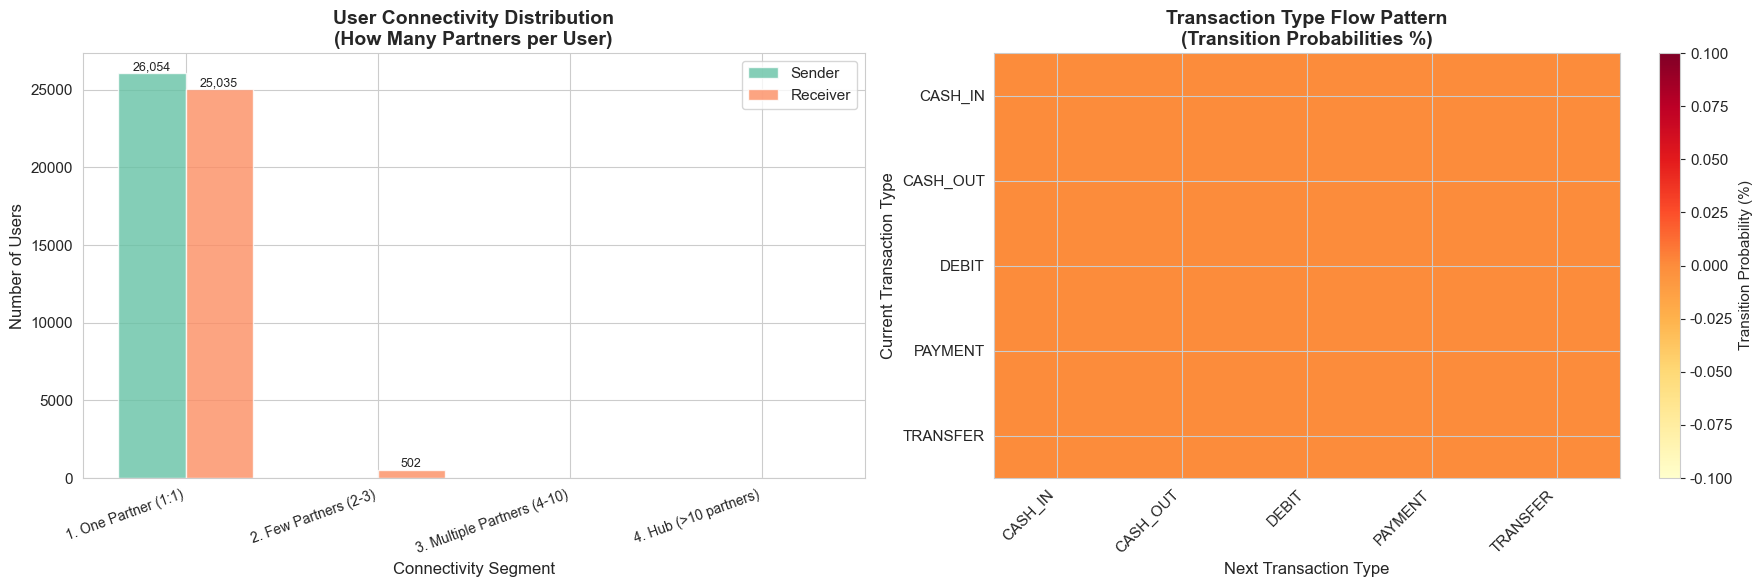

In [11]:
# ============================================================
# PART 2.1: 거래 연결 구조 & 경로 패턴
# ============================================================

# 2.1.1 유저별 연결 계정 수 (Degree Distribution)
user_connectivity_query = """
WITH sender_connections AS (
    SELECT 
        nameOrig as user_id,
        COUNT(DISTINCT nameDest) as unique_connections,
        COUNT(*) as tx_count,
        'Sender' as role
    FROM paysim
    GROUP BY nameOrig
),
receiver_connections AS (
    SELECT 
        nameDest as user_id,
        COUNT(DISTINCT nameOrig) as unique_connections,
        COUNT(*) as tx_count,
        'Receiver' as role
    FROM paysim
    GROUP BY nameDest
),
all_connections AS (
    SELECT * FROM sender_connections
    UNION ALL
    SELECT * FROM receiver_connections
)
SELECT 
    CASE 
        WHEN unique_connections = 1 THEN '1. One Partner (1:1)'
        WHEN unique_connections <= 3 THEN '2. Few Partners (2-3)'
        WHEN unique_connections <= 10 THEN '3. Multiple Partners (4-10)'
        ELSE '4. Hub (>10 partners)'
    END AS connectivity_segment,
    role,
    COUNT(*) as user_count,
    ROUND(AVG(unique_connections), 2) as avg_connections,
    ROUND(AVG(tx_count), 2) as avg_tx_per_user
FROM all_connections
GROUP BY connectivity_segment, role
ORDER BY role, connectivity_segment;
"""

# 2.1.2 허브 계정 분석 (분리된 쿼리)
receiver_hubs_query = """
SELECT 
    nameDest as account_id,
    COUNT(DISTINCT nameOrig) as unique_connections,
    COUNT(*) as total_tx,
    ROUND(SUM(amount), 2) as total_amount,
    'Receiver Hub' as hub_type
FROM paysim
GROUP BY nameDest
HAVING COUNT(DISTINCT nameOrig) >= 3
ORDER BY unique_connections DESC
LIMIT 10;
"""

sender_hubs_query = """
SELECT 
    nameOrig as account_id,
    COUNT(DISTINCT nameDest) as unique_connections,
    COUNT(*) as total_tx,
    ROUND(SUM(amount), 2) as total_amount,
    'Sender Hub' as hub_type
FROM paysim
GROUP BY nameOrig
HAVING COUNT(DISTINCT nameDest) >= 3
ORDER BY unique_connections DESC
LIMIT 10;
"""

# 2.1.3 거래 타입 시퀀스 패턴 (단순화)
transaction_sequence_query = """
SELECT 
    type as first_transaction_type,
    COUNT(*) as user_count,
    ROUND(AVG(amount), 2) as avg_amount
FROM (
    SELECT 
        nameOrig,
        type,
        amount,
        ROW_NUMBER() OVER (PARTITION BY nameOrig ORDER BY step) as tx_order
    FROM paysim
) as first_tx
WHERE tx_order = 1
GROUP BY type
ORDER BY user_count DESC;
"""

# 2.1.4 거래 타입별 다음 거래 예측
transaction_flow_query = """
WITH user_tx_ordered AS (
    SELECT 
        nameOrig,
        type as current_type,
        LEAD(type) OVER (PARTITION BY nameOrig ORDER BY step) as next_type
    FROM paysim
)
SELECT 
    current_type,
    next_type,
    COUNT(*) as transition_count,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (PARTITION BY current_type), 2) as transition_percentage
FROM user_tx_ordered
WHERE next_type IS NOT NULL
GROUP BY current_type, next_type
ORDER BY current_type, transition_count DESC;
"""

try:
    # 데이터 조회
    connectivity = pd.read_sql_query(user_connectivity_query, engine)
    receiver_hubs = pd.read_sql_query(receiver_hubs_query, engine)
    sender_hubs = pd.read_sql_query(sender_hubs_query, engine)
    top_hubs = pd.concat([receiver_hubs, sender_hubs], ignore_index=True)
    first_tx = pd.read_sql_query(transaction_sequence_query, engine)
    tx_flow = pd.read_sql_query(transaction_flow_query, engine)
    
    # 결과 출력
    print("=" * 80)
    print("User Connectivity Distribution")
    print("=" * 80)
    print(connectivity.to_string(index=False))
    print("\n")
    
    print("=" * 80)
    print("Top Hub Accounts (Most Connected)")
    print("=" * 80)
    print(top_hubs.to_string(index=False))
    print("\n")
    
    print("=" * 80)
    print("First Transaction Type Distribution")
    print("=" * 80)
    print(first_tx.to_string(index=False))
    print("\n")
    
    print("=" * 80)
    print("Transaction Type Flow (Transition Probabilities)")
    print("=" * 80)
    print(tx_flow.to_string(index=False))
    print("\n")
    
    # 시각화 - 핵심 2개
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # 1. 유저 연결성 분포 (Sender vs Receiver)
    ax1 = axes[0]
    
    # 데이터 준비
    sender_data = connectivity[connectivity['role'] == 'Sender'].copy()
    receiver_data = connectivity[connectivity['role'] == 'Receiver'].copy()
    
    # 세그먼트 순서 맞추기
    segments = ['1. One Partner (1:1)', '2. Few Partners (2-3)', 
                '3. Multiple Partners (4-10)', '4. Hub (>10 partners)']
    
    sender_counts = []
    receiver_counts = []
    
    for seg in segments:
        s_val = sender_data[sender_data['connectivity_segment'] == seg]['user_count'].values
        r_val = receiver_data[receiver_data['connectivity_segment'] == seg]['user_count'].values
        sender_counts.append(s_val[0] if len(s_val) > 0 else 0)
        receiver_counts.append(r_val[0] if len(r_val) > 0 else 0)
    
    x = np.arange(len(segments))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, sender_counts, 
                    width, label='Sender', color='#66c2a5', alpha=0.8)
    bars2 = ax1.bar(x + width/2, receiver_counts, 
                    width, label='Receiver', color='#fc8d62', alpha=0.8)
    
    ax1.set_xlabel('Connectivity Segment', fontsize=12)
    ax1.set_ylabel('Number of Users', fontsize=12)
    ax1.set_title('User Connectivity Distribution\n(How Many Partners per User)', 
                  fontsize=14, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(segments, rotation=20, ha='right', fontsize=10)
    ax1.legend(fontsize=11)
    
    # 값 표시
    for i, (s, r) in enumerate(zip(sender_counts, receiver_counts)):
        if s > 0:
            ax1.text(i - width/2, s, f'{int(s):,}',
                    ha='center', va='bottom', fontsize=9)
        if r > 0:
            ax1.text(i + width/2, r, f'{int(r):,}',
                    ha='center', va='bottom', fontsize=9)
    
    # 2. 거래 타입 흐름 (히트맵)
    ax2 = axes[1]
    
    # Transition Matrix 생성
    tx_types = ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']
    matrix = np.zeros((len(tx_types), len(tx_types)))
    
    for _, row in tx_flow.iterrows():
        if row['current_type'] in tx_types and row['next_type'] in tx_types:
            i = tx_types.index(row['current_type'])
            j = tx_types.index(row['next_type'])
            matrix[i, j] = row['transition_percentage']
    
    im = ax2.imshow(matrix, cmap='YlOrRd', aspect='auto')
    
    ax2.set_xticks(np.arange(len(tx_types)))
    ax2.set_yticks(np.arange(len(tx_types)))
    ax2.set_xticklabels(tx_types, rotation=45, ha='right')
    ax2.set_yticklabels(tx_types)
    ax2.set_xlabel('Next Transaction Type', fontsize=12)
    ax2.set_ylabel('Current Transaction Type', fontsize=12)
    ax2.set_title('Transaction Type Flow Pattern\n(Transition Probabilities %)', 
                  fontsize=14, fontweight='bold')
    
    # 값 표시
    for i in range(len(tx_types)):
        for j in range(len(tx_types)):
            if matrix[i, j] > 0:
                text = ax2.text(j, i, f'{matrix[i, j]:.0f}%',
                               ha="center", va="center", 
                               color="white" if matrix[i, j] > 50 else "black",
                               fontsize=10, fontweight='bold')
    
    # 컬러바
    cbar = plt.colorbar(im, ax=ax2)
    cbar.set_label('Transition Probability (%)', fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Query execution error: {e}")

---

**2. 허브 계정의 부재 (No Real Hubs)**

**Top "Hub" 계정들**:
- 가장 많이 연결된 계정도 고작 **3명**과 거래
- 실제 허브(>10 connections)는 **존재하지 않음**
- Merchant나 중개자 역할을 하는 계정 없음

**일반적인 금융 플랫폼과 비교**:
| 플랫폼 유형 | 허브 존재 | 연결 패턴 |
|------------|-----------|-----------|
| **일반 결제 플랫폼** | O (상점, 은행) | 소수가 수백~수천 연결 |
| **PaySim 데이터** | X | 모두 1~3 연결 |

---

**3. 거래 시퀀스의 부재 (No Sequential Patterns)**

**첫 거래 타입 분포**:
- CASH_OUT: 9,156명 (35.1%)
- PAYMENT: 8,793명 (33.7%)
- CASH_IN: 5,783명 (22.2%)
- TRANSFER: 2,159명 (8.3%)

**거래 흐름 패턴**:
- **Transition Matrix: 완전히 비어있음**
- 이유: 모든 유저가 1회만 거래하므로 "다음 거래"가 없음

**의미**:

---

### PART 2 결론

**플랫폼의 본질: "거래 매칭 서비스"**

| 측면 | 발견 | 의미 |
|------|------|------|
| **연결성** | 100% 가 1:1 연결 | 네트워크 효과 없음 |
| **허브** | 존재하지 않음 | Merchant/중개자 부재 |
| **거래 흐름** | 단일 거래로 종료 | 여정(Journey) 없음 |
| **구조** | 독립적 쌍들의 집합 | 진정한 "플랫폼"이 아님 |

---

### 다음 단계 예고

PART 2에서 **"거래가 어떻게 연결되는가"**를 확인함 → 연결 없음!

**마지막 질문**:
- 시간에 따라 변화가 있는가?
- 신규 vs 기존 유저 차이는?
- isActivation, isReferral의 영향은?

→ **PART 3: User Behavior & Temporal Analysis**로 마무리

---

# PART 3: User Behavior & Temporal Analysis (유저 행동 & 시간 분석)

## 분석 목표
"시간에 따라 무엇이 변하고, 유저 특성이 거래에 어떤 영향을 미치는가?"

PART 1, 2에서 자금 흐름과 네트워크 구조를 확인함. 마지막으로 **시간적 변화**와 **유저 특성**을 분석함:
- 시간(step)에 따라 거래 패턴이 변하는가?
- 신규 유저와 기존 유저의 차이는?
- Activation과 Referral이 미치는 영향은?

---

## 3.1 시간 기반 패턴 & 유저 특성 분석

### 분석 질문
1. **시간에 따른 거래 추이는?** 특정 시점에 거래가 집중되는가?
2. **신규 vs 기존 유저 차이는?** 가입 시점에 따른 행동 차이
3. **Activation/Referral 영향은?** 활성화 여부와 추천 여부가 거래에 미치는 영향

### 가설
"거래는 특정 시점에 집중되며, 활성화된 유저(isActivation=1)와 추천 유저(isReferral=1)가 더 안정적인 거래 패턴을 보일 것"

---

Temporal Trend (Transaction by Step)
 step  tx_count  total_amount  avg_amount  unique_senders
    1        13    1125231.64    86556.28              13
    2         3       7338.75     2446.25               3
    3         1      54663.15    54663.15               1
    4         2     181258.76    90629.38               2
    5         4      88885.56    22221.39               4
    6         6     459338.36    76556.39               6
    7        35    5310202.79   151720.08              35
    8        93   15041045.55   161731.67              93
    9       158   27759880.97   175695.45             158
   10       142   22471321.61   158248.74             142
   11       145   28055926.19   193489.15             145
   12       157   30170335.50   192167.74             157
   13       169   33535619.83   198435.62             169
   14       185   29327943.43   158529.42             185
   15       163   22407642.48   137470.20             163
   16       173   28132446.90   162

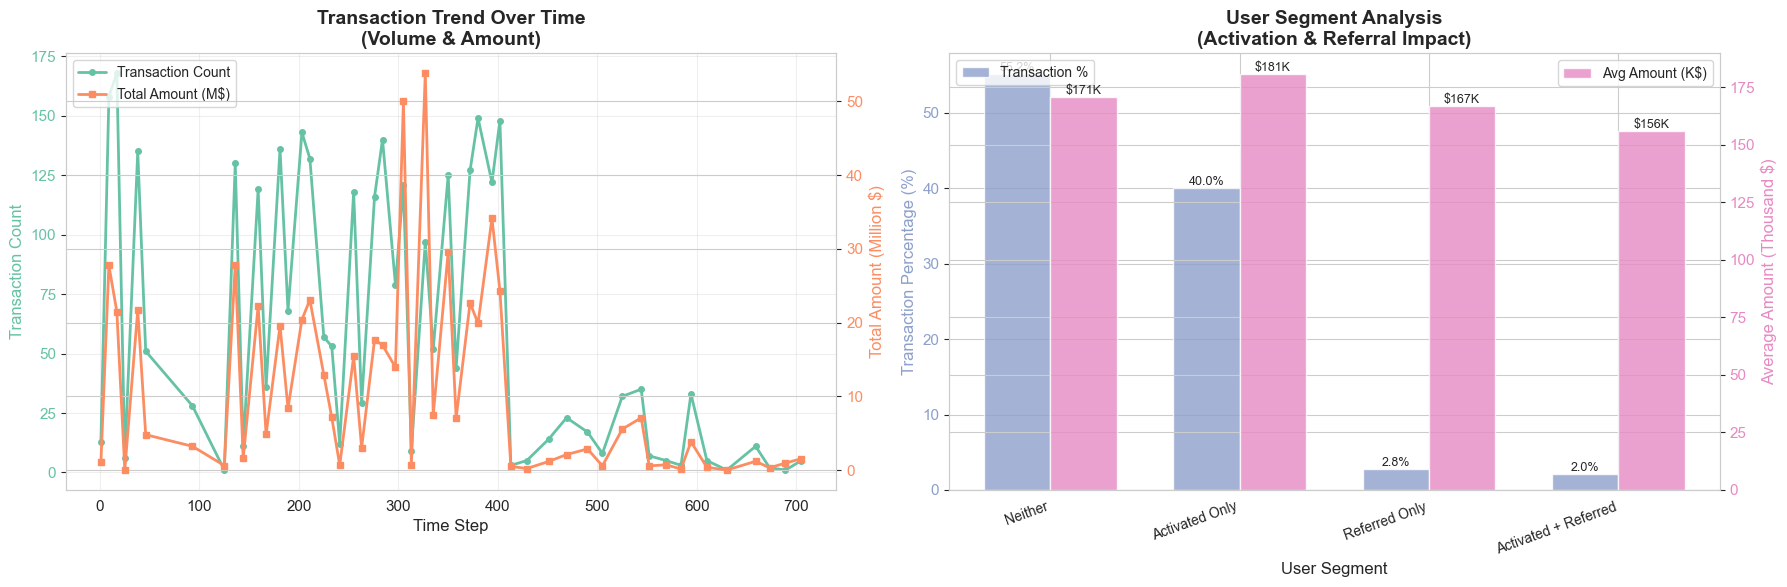

In [13]:
# ============================================================
# PART 3.1: 시간 기반 패턴 & 유저 특성 분석
# ============================================================

# 3.1.1 시간대별 거래 추이 (Step별)
temporal_trend_query = """
SELECT 
    step,
    COUNT(*) as tx_count,
    ROUND(SUM(amount), 2) as total_amount,
    ROUND(AVG(amount), 2) as avg_amount,
    COUNT(DISTINCT nameOrig) as unique_senders
FROM paysim
GROUP BY step
ORDER BY step;
"""

# 3.1.2 신규 vs 기존 유저 비교 (signup_step 기준)
user_lifecycle_query = """
SELECT 
    CASE 
        WHEN step = signup_step THEN 'New User (First Transaction)'
        WHEN step - signup_step <= 10 THEN 'Recent User (Within 10 steps)'
        ELSE 'Existing User (>10 steps)'
    END AS user_lifecycle,
    COUNT(*) as tx_count,
    ROUND(AVG(amount), 2) as avg_amount,
    COUNT(DISTINCT nameOrig) as unique_users,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM paysim), 2) as tx_percentage
FROM paysim
GROUP BY user_lifecycle
ORDER BY 
    CASE user_lifecycle
        WHEN 'New User (First Transaction)' THEN 1
        WHEN 'Recent User (Within 10 steps)' THEN 2
        ELSE 3
    END;
"""

# 3.1.3 Activation & Referral 영향 분석
activation_referral_query = """
SELECT 
    CASE 
        WHEN isActivation = 1 AND isReferral = 1 THEN 'Activated + Referred'
        WHEN isActivation = 1 AND isReferral = 0 THEN 'Activated Only'
        WHEN isActivation = 0 AND isReferral = 1 THEN 'Referred Only'
        ELSE 'Neither'
    END AS user_segment,
    COUNT(*) as tx_count,
    ROUND(AVG(amount), 2) as avg_amount,
    COUNT(DISTINCT nameOrig) as unique_users,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM paysim), 2) as tx_percentage
FROM paysim
GROUP BY user_segment
ORDER BY tx_count DESC;
"""

# 3.1.4 거래 타입별 시간 분포
type_temporal_query = """
SELECT 
    type,
    ROUND(AVG(step), 2) as avg_step,
    MIN(step) as min_step,
    MAX(step) as max_step,
    COUNT(*) as tx_count
FROM paysim
GROUP BY type
ORDER BY avg_step;
"""

# 3.1.5 Activation/Referral별 거래 타입 선호도 (수정)
preference_query = """
WITH activation_totals AS (
    SELECT 
        isActivation,
        COUNT(*) as total_by_activation
    FROM paysim
    GROUP BY isActivation
)
SELECT 
    CASE 
        WHEN p.isActivation = 1 THEN 'Activated'
        ELSE 'Not Activated'
    END AS activation_status,
    p.type,
    COUNT(*) as tx_count,
    ROUND(COUNT(*) * 100.0 / a.total_by_activation, 2) as percentage_within_group
FROM paysim p
JOIN activation_totals a ON p.isActivation = a.isActivation
GROUP BY p.isActivation, activation_status, p.type, a.total_by_activation
ORDER BY activation_status, tx_count DESC;
"""

try:
    # 데이터 조회
    temporal_trend = pd.read_sql_query(temporal_trend_query, engine)
    user_lifecycle = pd.read_sql_query(user_lifecycle_query, engine)
    activation_referral = pd.read_sql_query(activation_referral_query, engine)
    type_temporal = pd.read_sql_query(type_temporal_query, engine)
    preference = pd.read_sql_query(preference_query, engine)
    
    # 결과 출력
    print("=" * 80)
    print("Temporal Trend (Transaction by Step)")
    print("=" * 80)
    print(temporal_trend.head(20).to_string(index=False))
    print(f"\n... (showing first 20 of {len(temporal_trend)} steps)\n")
    
    print("=" * 80)
    print("User Lifecycle Analysis")
    print("=" * 80)
    print(user_lifecycle.to_string(index=False))
    print("\n")
    
    print("=" * 80)
    print("Activation & Referral Impact")
    print("=" * 80)
    print(activation_referral.to_string(index=False))
    print("\n")
    
    print("=" * 80)
    print("Transaction Type by Time Period")
    print("=" * 80)
    print(type_temporal.to_string(index=False))
    print("\n")
    
    print("=" * 80)
    print("Transaction Type Preference by Activation Status")
    print("=" * 80)
    print(preference.to_string(index=False))
    print("\n")
    
    # 시각화 - 핵심 2개
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # 1. 시간대별 거래 추이 (Step별 거래 건수 & 금액)
    ax1 = axes[0]
    ax1_twin = ax1.twinx()
    
    # 데이터가 많으면 샘플링
    if len(temporal_trend) > 100:
        step_interval = max(1, len(temporal_trend) // 50)
        plot_data = temporal_trend.iloc[::step_interval]
    else:
        plot_data = temporal_trend
    
    line1 = ax1.plot(plot_data['step'], plot_data['tx_count'], 
                     color='#66c2a5', linewidth=2, marker='o', markersize=4,
                     label='Transaction Count')
    line2 = ax1_twin.plot(plot_data['step'], plot_data['total_amount']/1e6, 
                          color='#fc8d62', linewidth=2, marker='s', markersize=4,
                          label='Total Amount (M$)')
    
    ax1.set_xlabel('Time Step', fontsize=12)
    ax1.set_ylabel('Transaction Count', fontsize=12, color='#66c2a5')
    ax1_twin.set_ylabel('Total Amount (Million $)', fontsize=12, color='#fc8d62')
    ax1.set_title('Transaction Trend Over Time\n(Volume & Amount)', 
                  fontsize=14, fontweight='bold')
    ax1.tick_params(axis='y', labelcolor='#66c2a5')
    ax1_twin.tick_params(axis='y', labelcolor='#fc8d62')
    ax1.grid(True, alpha=0.3)
    
    # 범례 통합
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left', fontsize=10)
    
    # 2. Activation & Referral 세그먼트별 비교
    ax2 = axes[1]
    
    segments = activation_referral['user_segment']
    tx_pct = activation_referral['tx_percentage']
    avg_amt = activation_referral['avg_amount'] / 1000  # 천 단위
    
    x = np.arange(len(segments))
    width = 0.35
    
    ax2_twin = ax2.twinx()
    
    bars1 = ax2.bar(x - width/2, tx_pct, 
                    width, label='Transaction %', color='#8da0cb', alpha=0.8)
    bars2 = ax2_twin.bar(x + width/2, avg_amt, 
                         width, label='Avg Amount (K$)', color='#e78ac3', alpha=0.8)
    
    ax2.set_xlabel('User Segment', fontsize=12)
    ax2.set_ylabel('Transaction Percentage (%)', fontsize=12, color='#8da0cb')
    ax2_twin.set_ylabel('Average Amount (Thousand $)', fontsize=12, color='#e78ac3')
    ax2.set_title('User Segment Analysis\n(Activation & Referral Impact)', 
                  fontsize=14, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(segments, rotation=20, ha='right', fontsize=10)
    ax2.tick_params(axis='y', labelcolor='#8da0cb')
    ax2_twin.tick_params(axis='y', labelcolor='#e78ac3')
    
    # 값 표시
    for i, (pct, amt) in enumerate(zip(tx_pct, avg_amt)):
        ax2.text(i - width/2, pct, f'{pct:.1f}%',
                ha='center', va='bottom', fontsize=9)
        ax2_twin.text(i + width/2, amt, f'${amt:.0f}K',
                     ha='center', va='bottom', fontsize=9)
    
    ax2.legend(loc='upper left', fontsize=10)
    ax2_twin.legend(loc='upper right', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Query execution error: {e}")

## 3.1 분석 결과: 시간적 변화와 유저 특성의 영향

### 핵심 발견 (Key Findings)

**1. 시간에 따른 거래 감소 추세 (Declining Trend)**

**시간대별 거래 패턴**:
- **초기(Step 1~200)**: 거래 건수 100~200건, 금액 $20M~$50M 수준
- **중기(Step 200~400)**: 변동성 큼, 간헐적 스파이크
- **후기(Step 400~)**: 거래 건수/금액 모두 급감 (거의 0에 수렴)

**인사이트**:

---

**2. 100% 신규 유저 데이터 (New User Only Dataset)**

**User Lifecycle 분석 결과**:
- **New User (First Transaction)**: 100% (26,054명 전원)
- **Recent User / Existing User**: 0%

**의미**:

**시뮬레이션의 한계**:
- 실제 플랫폼에서는 신규/기존 유저가 혼재
- 이 데이터는 "신규 온보딩 분석"용으로만 유효

---

**3. Activation의 결정적 영향 (Activation is Critical)**

**Activation & Referral 세그먼트 비교**:

| 세그먼트 | 거래 비중 | 평균 금액 | 주요 거래 타입 |
|----------|-----------|-----------|---------------|
| **Neither** | 55.2% | $171K | CASH_OUT (60.6%), CASH_IN (38.3%) |
| **Activated Only** | 40.0% | $181K | PAYMENT (80.3%), TRANSFER (19.7%) |
| **Referred Only** | 2.8% | $167K | - |
| **Activated + Referred** | 2.0% | $156K | - |

**핵심 인사이트**:

**Referral의 미미한 영향**:
- Referred Only: 2.8%
- Activated + Referred: 2.0%
- 추천은 활성화에 비해 영향력이 매우 작음

---

**4. 거래 타입의 시간적 분포 (Temporal Distribution by Type)**

**평균 발생 시점 (avg_step)**:
- CASH_OUT: 240.45
- CASH_IN: 243.35
- PAYMENT: 245.45
- TRANSFER: 246.30
- DEBIT: 262.68

**인사이트**:

---

### PART 3 결론

**플랫폼의 시간적 특성: "단기 캠페인 스타일 데이터"**

| 측면 | 발견 | 의미 |
|------|------|------|
| **시간 추세** | 초기 집중 → 급격한 감소 | 신규 유입 중단 후 소멸 |
| **유저 구성** | 100% 신규 유저 | 기존 유저 데이터 부재 |
| **Activation 영향** | 거래 타입 완전 결정 | 핵심 분기점 |
| **Referral 영향** | 2.8%로 미미 | 무시 가능 수준 |

**비즈니스 함의**:

**Activation의 중요성**:

**전략 제안**:
1. **Activation 최우선**: 가입 후 즉시 활성화 유도
2. **Referral 재설계**: 현재 효과 미미, 인센티브 강화 필요
3. **신규 유입 지속**: 일회성 유저만 있으므로 지속적 마케팅 필수

---